In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

In [2]:
mnist_train = datasets.MNIST(root="./datasets/mnist", download=True, train=True, transform=ToTensor())
mnist_test = datasets.MNIST(root="./datasets/mnist", download=True, train=False, transform=ToTensor())

In [3]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./datasets/mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
print(mnist_train[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(mnist_train, batch_size=512, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=512, shuffle=True)

In [6]:
for x, y in train_dataloader:
    print(x.shape, y.shape)
    break

torch.Size([512, 1, 28, 28]) torch.Size([512])


In [7]:
model = nn.Sequential(
    nn.Linear(28*28, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [8]:
model.to("cuda")

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
)

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
from tqdm import tqdm

for i in range(50):
    losses = 0
    print(f"[] INFO:  Epoch: {i + 1}")
    for x, y in tqdm(train_dataloader):
        x = x.reshape((-1, 784)).to("cuda")
        y = F.one_hot(y, num_classes=10).type(torch.float32).to("cuda")
        optimizer.zero_grad()
        outputs = model(x)
        loss = loss_fn(outputs, y)
        losses += loss
        loss.backward()
        optimizer.step()    
    print(losses.item())

[] INFO:  Epoch: 1


100%|████████████████████| 118/118 [00:07<00:00, 15.40it/s]


68.65065002441406
[] INFO:  Epoch: 2


100%|████████████████████| 118/118 [00:07<00:00, 15.35it/s]


26.253087997436523
[] INFO:  Epoch: 3


100%|████████████████████| 118/118 [00:07<00:00, 14.79it/s]


18.949678421020508
[] INFO:  Epoch: 4


100%|████████████████████| 118/118 [00:07<00:00, 15.17it/s]


14.597127914428711
[] INFO:  Epoch: 5


100%|████████████████████| 118/118 [00:07<00:00, 15.21it/s]


11.686924934387207
[] INFO:  Epoch: 6


100%|████████████████████| 118/118 [00:08<00:00, 13.82it/s]


9.668377876281738
[] INFO:  Epoch: 7


100%|████████████████████| 118/118 [00:08<00:00, 14.20it/s]


7.81859016418457
[] INFO:  Epoch: 8


100%|████████████████████| 118/118 [00:07<00:00, 14.89it/s]


6.555301666259766
[] INFO:  Epoch: 9


100%|████████████████████| 118/118 [00:07<00:00, 15.22it/s]


5.490547180175781
[] INFO:  Epoch: 10


100%|████████████████████| 118/118 [00:07<00:00, 16.21it/s]


4.72392463684082
[] INFO:  Epoch: 11


100%|████████████████████| 118/118 [00:07<00:00, 15.91it/s]


3.957009792327881
[] INFO:  Epoch: 12


100%|████████████████████| 118/118 [00:07<00:00, 15.61it/s]


3.245021343231201
[] INFO:  Epoch: 13


100%|████████████████████| 118/118 [00:07<00:00, 15.66it/s]


2.6715097427368164
[] INFO:  Epoch: 14


100%|████████████████████| 118/118 [00:07<00:00, 15.92it/s]


2.2086031436920166
[] INFO:  Epoch: 15


100%|████████████████████| 118/118 [00:07<00:00, 16.11it/s]


1.8257901668548584
[] INFO:  Epoch: 16


100%|████████████████████| 118/118 [00:07<00:00, 16.62it/s]


1.5656508207321167
[] INFO:  Epoch: 17


100%|████████████████████| 118/118 [00:07<00:00, 16.62it/s]


1.3436349630355835
[] INFO:  Epoch: 18


100%|████████████████████| 118/118 [00:07<00:00, 15.99it/s]


1.1496537923812866
[] INFO:  Epoch: 19


100%|████████████████████| 118/118 [00:07<00:00, 16.44it/s]


0.8368566632270813
[] INFO:  Epoch: 20


100%|████████████████████| 118/118 [00:06<00:00, 16.97it/s]


0.7473442554473877
[] INFO:  Epoch: 21


100%|████████████████████| 118/118 [00:07<00:00, 16.34it/s]


0.6739275455474854
[] INFO:  Epoch: 22


100%|████████████████████| 118/118 [00:07<00:00, 16.61it/s]


0.5117532014846802
[] INFO:  Epoch: 23


100%|████████████████████| 118/118 [00:06<00:00, 17.16it/s]


0.4133669137954712
[] INFO:  Epoch: 24


100%|████████████████████| 118/118 [00:06<00:00, 17.12it/s]


0.320107638835907
[] INFO:  Epoch: 25


100%|████████████████████| 118/118 [00:07<00:00, 16.58it/s]


0.22581738233566284
[] INFO:  Epoch: 26


100%|████████████████████| 118/118 [00:06<00:00, 17.02it/s]


0.1948384940624237
[] INFO:  Epoch: 27


100%|████████████████████| 118/118 [00:07<00:00, 16.81it/s]


0.15661276876926422
[] INFO:  Epoch: 28


100%|████████████████████| 118/118 [00:07<00:00, 16.54it/s]


0.13045570254325867
[] INFO:  Epoch: 29


100%|████████████████████| 118/118 [00:06<00:00, 17.05it/s]


0.11932962387800217
[] INFO:  Epoch: 30


100%|████████████████████| 118/118 [00:06<00:00, 16.91it/s]


0.15736518800258636
[] INFO:  Epoch: 31


100%|████████████████████| 118/118 [00:06<00:00, 17.13it/s]


0.1412733644247055
[] INFO:  Epoch: 32


100%|████████████████████| 118/118 [00:07<00:00, 16.77it/s]


0.0929836705327034
[] INFO:  Epoch: 33


100%|████████████████████| 118/118 [00:06<00:00, 17.31it/s]


0.0661504939198494
[] INFO:  Epoch: 34


100%|████████████████████| 118/118 [00:07<00:00, 16.65it/s]


0.05655653029680252
[] INFO:  Epoch: 35


100%|████████████████████| 118/118 [00:06<00:00, 17.11it/s]


0.047963835299015045
[] INFO:  Epoch: 36


100%|████████████████████| 118/118 [00:07<00:00, 16.42it/s]


0.04097594693303108
[] INFO:  Epoch: 37


100%|████████████████████| 118/118 [00:07<00:00, 16.67it/s]


0.03677329048514366
[] INFO:  Epoch: 38


100%|████████████████████| 118/118 [00:07<00:00, 16.68it/s]


0.03590357303619385
[] INFO:  Epoch: 39


100%|████████████████████| 118/118 [00:07<00:00, 16.24it/s]


0.03315402567386627
[] INFO:  Epoch: 40


100%|████████████████████| 118/118 [00:07<00:00, 16.40it/s]


0.02907094731926918
[] INFO:  Epoch: 41


100%|████████████████████| 118/118 [00:07<00:00, 16.31it/s]


0.02936074696481228
[] INFO:  Epoch: 42


100%|████████████████████| 118/118 [00:06<00:00, 17.24it/s]


2.2270474433898926
[] INFO:  Epoch: 43


100%|████████████████████| 118/118 [00:06<00:00, 17.04it/s]


3.630157709121704
[] INFO:  Epoch: 44


100%|████████████████████| 118/118 [00:06<00:00, 17.28it/s]


0.9829421043395996
[] INFO:  Epoch: 45


100%|████████████████████| 118/118 [00:07<00:00, 16.56it/s]


0.3178956210613251
[] INFO:  Epoch: 46


100%|████████████████████| 118/118 [00:06<00:00, 17.30it/s]


0.1156226098537445
[] INFO:  Epoch: 47


100%|████████████████████| 118/118 [00:06<00:00, 17.45it/s]


0.0604369156062603
[] INFO:  Epoch: 48


100%|████████████████████| 118/118 [00:06<00:00, 17.43it/s]


0.04240221530199051
[] INFO:  Epoch: 49


100%|████████████████████| 118/118 [00:06<00:00, 17.18it/s]


0.035088494420051575
[] INFO:  Epoch: 50


100%|████████████████████| 118/118 [00:06<00:00, 17.15it/s]

0.030890395864844322


In [11]:
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
)

In [12]:
with torch.no_grad():
    correct = 0
    total = 0    
    test_loss = 0
    for x, y in tqdm(test_dataloader):
        x = x.reshape((-1, 784)).to("cuda")
        y = y.to("cuda")    
        outputs = model(x)
        preds = outputs.argmax(dim=1)    
        correct += (preds == y).sum().item()    
        loss = loss_fn(outputs, y)
        total += y.size(0)   
        test_loss += loss.item() * y.size(0)
    accuracy = correct / total
    loss = test_loss / total
    print(f"Accuracy: {accuracy}, Test loss: {loss}")

100%|██████████████████████| 20/20 [00:01<00:00, 17.84it/s]

Accuracy: 0.9814, Test loss: 0.09410293641090393


In [13]:
from PIL import Image
import matplotlib.pyplot as plt

In [14]:
img = Image.open("test/4.png")

In [15]:
img = img.convert("L")
img

In [16]:
t = ToTensor()
img = 1 - t(img)
img.shape

torch.Size([1, 28, 28])

In [17]:
with torch.no_grad():
    outputs = nn.functional.softmax(model(img.reshape((-1, 28*28)).to('cuda')))
    print(outputs)
    preds = outputs.argmax(dim=1) 
    print(preds.item())

tensor([[7.1300e-18, 6.3297e-04, 3.5786e-19, 1.9123e-09, 9.9937e-01, 3.5351e-10,
         3.4618e-10, 5.3824e-08, 8.9514e-13, 1.8539e-13]], device='cuda:0')
4


C:\Users\praveenchakra.bh\AppData\Local\Temp\ipykernel_15944\3363596674.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = nn.functional.softmax(model(img.reshape((-1, 28*28)).to('cuda')))


In [18]:
img = Image.open("test/3.png").convert("L")
img = 1 - t(img)
with torch.no_grad():
    outputs = nn.functional.softmax(model(img.reshape((-1, 28*28)).to('cuda')))
    print(outputs)
    preds = outputs.argmax(dim=1) 
    print(preds.item())

tensor([[8.0447e-28, 2.1731e-16, 1.5844e-06, 1.0000e+00, 2.3553e-37, 1.5573e-19,
         3.7953e-28, 2.3415e-27, 6.6373e-14, 1.2210e-40]], device='cuda:0')
3


C:\Users\praveenchakra.bh\AppData\Local\Temp\ipykernel_15944\3451494212.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = nn.functional.softmax(model(img.reshape((-1, 28*28)).to('cuda')))


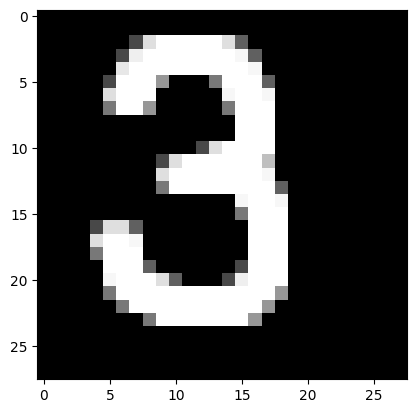

In [22]:
plt.imshow(img.squeeze(), cmap="gray")